<a href="https://colab.research.google.com/github/IshaqKHATTAK/Natural-Language-Processing/blob/main/2020313_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('reuters')
from nltk.corpus import reuters

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [ ]:
#getting the fileids for test and train
train_doc = [d for d in reuters.fileids() if d.startswith('train')]
test_doc = [d for d in reuters.fileids() if d.startswith('test')]

In [ ]:
#load the dataset
train_data = [reuters.raw(doc_id) for doc_id in train_doc]
train_label = [reuters.categories(doc_id)[0] for doc_id in train_doc]

test_data = [reuters.raw(doc_id) for doc_id in test_doc]
test_label = [reuters.categories(doc_id)[0] for doc_id in test_doc]

In [ ]:
len(set(train_label)) 

74

#preparing data

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize(text):
  return word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def remove_stopwords(tokens):
  return [word for word in tokens if word not in sw]

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


lemetizer = WordNetLemmatizer()
def lemetize(words):
  return [lemetizer.lemmatize(word) for word in words]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def list_to_string(tokens):
  return ' '.join(tokens)

In [ ]:
for idx in range(len(train_data)):
  train_data[idx] = tokenize(train_data[idx])
  train_data[idx] = remove_stopwords(train_data[idx])
  train_data[idx] = lemetize(train_data[idx])
  train_data[idx] = list_to_string(train_data[idx])

for idx in range(len(test_data)):
  test_data[idx] = tokenize(test_data[idx])
  test_data[idx] = remove_stopwords(test_data[idx])
  test_data[idx] = lemetize(test_data[idx])
  test_data[idx] = list_to_string(test_data[idx])

*train test split*

In [ ]:
#already divided into 80:20 train test split in the second top cell

#Feature extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

reuter_tfidf_train_vec = tfidf.fit_transform(train_data)

In [ ]:
reuter_tfidf_test_vec = tfidf.fit_transform(test_data)
reuter_tfidf_test_arr = reuter_tfidf_test_vec.toarray()

In [ ]:
tfidf.get_feature_names_out()

array(['00', '000', '0000', ..., 'zwermann', 'zy', 'üside'], dtype=object)

In [ ]:
reuter_tfidf_train_arr = reuter_tfidf_train_vec.toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_label + test_label)
train_label = le.transform(train_label)

In [ ]:
test_label = le.transform(test_label)

*Model implementation*

In [ ]:
import numpy as np
import random
import pandas as pd
import sys
import os
import time
import codecs
import collections
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from nltk.tokenize import sent_tokenize, word_tokenize
import scipy
from scipy import spatial
from nltk.tokenize import word_tokenize,ToktokTokenizer
import re

In [ ]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding,Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Conv1D, SimpleRNN
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras import initializers, regularizers, constraints,optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout,BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
#from keras.layers.recurrent import SimpleRNN
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [ ]:


# Padding data for equal lengths, for our models
training_data = pad_sequences(reuter_tfidf_train_arr, maxlen=300)
testing_data = pad_sequences(reuter_tfidf_test_arr, maxlen=300)

In [ ]:
print(training_data.shape)
print(testing_data.shape)

(7769, 300)
(3019, 300)


In [ ]:
train_label

array([ 6,  0, 46, ..., 21, 21, 21])

In [ ]:
# Converting the labels to categorical
# To pass through our model
y_train_cat = to_categorical(np.asarray(train_label))
y_test_cat = to_categorical(np.asarray(test_label))
print('Shape of data tensor', training_data.shape)
print('Shape of label tensors (training)', y_train_cat.shape)
print('Shape of label tensors (testing)', y_test_cat.shape)

Shape of data tensor (7769, 300)
Shape of label tensors (training) (7769, 79)
Shape of label tensors (testing) (3019, 79)


In [ ]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Defining our embedding dimension
embeds = 100

In [ ]:
print('Training CNN 1D model')
model = Sequential()
# 20000 was our maximum word number in the tokenizer
model.add(Embedding(20000,
 embeds,
 input_length=300
 ))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(79, activation='softmax'))
model.compile(loss='categorical_crossentropy',
 optimizer='rmsprop',
 metrics=['acc'])

Training CNN 1D model


In [ ]:
model.fit(training_data, y_train_cat, batch_size=64, epochs=5, validation_data = (testing_data, y_test_cat))

Epoch 1/5
122/122 [==============================] - 49s 389ms/step - loss: 2.9871 - acc: 0.2858 - val_loss: 3.1013 - val_acc: 0.3587
Epoch 2/5
122/122 [==============================] - 48s 394ms/step - loss: 2.6972 - acc: 0.3250 - val_loss: 3.5162 - val_acc: 0.3587
Epoch 3/5
122/122 [==============================] - 50s 412ms/step - loss: 2.6331 - acc: 0.3412 - val_loss: 3.6282 - val_acc: 0.3587
Epoch 4/5
122/122 [==============================] - 43s 350ms/step - loss: 2.6026 - acc: 0.3546 - val_loss: 3.3866 - val_acc: 0.3587
Epoch 5/5
122/122 [==============================] - 47s 387ms/step - loss: 2.5847 - acc: 0.3620 - val_loss: 2.8068 - val_acc: 0.3587


In [ ]:
predicted=model.predict(testing_data)
predicted

95/95 [==============================] - 3s 31ms/step


array([[0.11338699, 0.01375712, 0.01750365, ..., 0.0103856 , 0.00136527,
        0.00337983],
       [0.11338699, 0.01375712, 0.01750365, ..., 0.0103856 , 0.00136527,
        0.00337983],
       [0.11338699, 0.01375712, 0.01750365, ..., 0.0103856 , 0.00136527,
        0.00337983],
       ...,
       [0.113387  , 0.01375712, 0.01750365, ..., 0.0103856 , 0.00136527,
        0.00337983],
       [0.113387  , 0.01375712, 0.01750365, ..., 0.0103856 , 0.00136527,
        0.00337983],
       [0.113387  , 0.01375712, 0.01750365, ..., 0.0103856 , 0.00136527,
        0.00337983]], dtype=float32)

In [ ]:
# Metrics
precision, recall, fscore, support = score(y_test_cat,predicted.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(y_test_cat,predicted.round()))


precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
fscore: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
support: [ 719   22   14   30   17    1   17    2    2   25   15    0   48   14
    0   24    1  182    1   43    1 1083    9    9   19   26   77    3
    0    4    4    3    5    1  124   11   14    1   13    2   12    3
    6    5    6   96   29

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

###RNN

In [ ]:
print('Training SIMPLERNN model.')
model = Sequential()
model.add(Embedding(20000,
 embeds,
 input_length=300
 ))
model.add(SimpleRNN(2, input_shape=(None,1)))
model.add(Dense(79,activation='softmax'))
model.compile(loss = 'binary_crossentropy',
optimizer='adam',metrics = ['accuracy'])
model.fit(training_data, y_train_cat,
 batch_size=16,
 epochs=5,
 validation_data=(testing_data, y_test_cat))

Training SIMPLERNN model.
Epoch 1/5
486/486 [==============================] - 69s 139ms/step - loss: 0.4171 - accuracy: 0.1644 - val_loss: 0.2476 - val_accuracy: 0.3587
Epoch 2/5
486/486 [==============================] - 62s 129ms/step - loss: 0.1801 - accuracy: 0.3659 - val_loss: 0.1329 - val_accuracy: 0.3587
Epoch 3/5
486/486 [==============================] - 64s 132ms/step - loss: 0.1088 - accuracy: 0.3659 - val_loss: 0.0901 - val_accuracy: 0.3587
Epoch 4/5
486/486 [==============================] - 62s 129ms/step - loss: 0.0794 - accuracy: 0.3659 - val_loss: 0.0703 - val_accuracy: 0.3587
Epoch 5/5
486/486 [==============================] - 50s 103ms/step - loss: 0.0649 - accuracy: 0.3659 - val_loss: 0.0597 - val_accuracy: 0.3587


In [ ]:
# probabilities
predicted_Srnn=model.predict(testing_data)
predicted_Srnn

95/95 [==============================] - 2s 20ms/step


array([[0.08972479, 0.00918381, 0.00935569, ..., 0.00980496, 0.00611063,
        0.00903238],
       [0.08972479, 0.00918381, 0.00935569, ..., 0.00980496, 0.00611063,
        0.00903238],
       [0.08972479, 0.00918381, 0.00935569, ..., 0.00980496, 0.00611063,
        0.00903238],
       ...,
       [0.08972479, 0.00918381, 0.00935569, ..., 0.00980497, 0.00611063,
        0.00903238],
       [0.08972479, 0.00918381, 0.00935569, ..., 0.00980497, 0.00611063,
        0.00903238],
       [0.08972479, 0.00918381, 0.00935569, ..., 0.00980497, 0.00611063,
        0.00903238]], dtype=float32)

In [ ]:
precision, recall, fscore, support = score(y_test_cat, predicted_Srnn.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(y_test_cat,predicted_Srnn.round()))

precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
fscore: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
support: [ 719   22   14   30   17    1   17    2    2   25   15    0   48   14
    0   24    1  182    1   43    1 1083    9    9   19   26   77    3
    0    4    4    3    5    1  124   11   14    1   13    2   12    3
    6    5    6   96   29

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

###LSTM

In [ ]:
print('Training LSTM model.')
model = Sequential()
model.add(Embedding(20000,
 embeds,
 input_length=300
 ))
model.add(LSTM(16, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(79,activation='softmax'))

model.compile(loss = 'binary_crossentropy',
optimizer='adam',metrics = ['accuracy'])
model.fit(training_data, y_train_cat,
 batch_size=16,
 epochs=5,
 validation_data=(testing_data, y_test_cat))

Training LSTM model.
Epoch 1/5
486/486 [==============================] - 88s 172ms/step - loss: 0.0658 - accuracy: 0.3222 - val_loss: 0.0462 - val_accuracy: 0.3587
Epoch 2/5
486/486 [==============================] - 87s 180ms/step - loss: 0.0446 - accuracy: 0.3446 - val_loss: 0.0430 - val_accuracy: 0.3587
Epoch 3/5
486/486 [==============================] - 89s 182ms/step - loss: 0.0441 - accuracy: 0.3515 - val_loss: 0.0431 - val_accuracy: 0.3587
Epoch 4/5
486/486 [==============================] - 88s 182ms/step - loss: 0.0438 - accuracy: 0.3520 - val_loss: 0.0432 - val_accuracy: 0.3587
Epoch 5/5
486/486 [==============================] - 88s 180ms/step - loss: 0.0434 - accuracy: 0.3621 - val_loss: 0.0431 - val_accuracy: 0.3587


In [ ]:
predicted_lstm=model.predict(testing_data)
predicted_lstm

95/95 [==============================] - 5s 51ms/step


array([[1.9686027e-01, 7.3245657e-03, 5.5596791e-03, ..., 1.7278714e-03,
        5.8335681e-05, 1.7396380e-03],
       [1.9686027e-01, 7.3245657e-03, 5.5596791e-03, ..., 1.7278714e-03,
        5.8335681e-05, 1.7396380e-03],
       [1.9686027e-01, 7.3245657e-03, 5.5596791e-03, ..., 1.7278714e-03,
        5.8335681e-05, 1.7396380e-03],
       ...,
       [1.9686027e-01, 7.3245657e-03, 5.5596791e-03, ..., 1.7278714e-03,
        5.8335681e-05, 1.7396380e-03],
       [1.9686027e-01, 7.3245657e-03, 5.5596791e-03, ..., 1.7278714e-03,
        5.8335681e-05, 1.7396380e-03],
       [1.9686027e-01, 7.3245657e-03, 5.5596791e-03, ..., 1.7278714e-03,
        5.8335681e-05, 1.7396380e-03]], dtype=float32)

In [ ]:
precision2, recall2, fscore2, support2 = score(y_test_cat, predicted_lstm.round())
print('precision: {}'.format(precision2))
print('recall: {}'.format(recall2))
print('fscore: {}'.format(fscore2))
print('support: {}'.format(support2))
print("############################")
print(sklearn.metrics.classification_report(y_test_cat,predicted_lstm.round()))

precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
fscore: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
support: [ 719   22   14   30   17    1   17    2    2   25   15    0   48   14
    0   24    1  182    1   43    1 1083    9    9   19   26   77    3
    0    4    4    3    5    1  124   11   14    1   13    2   12    3
    6    5    6   96   29

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

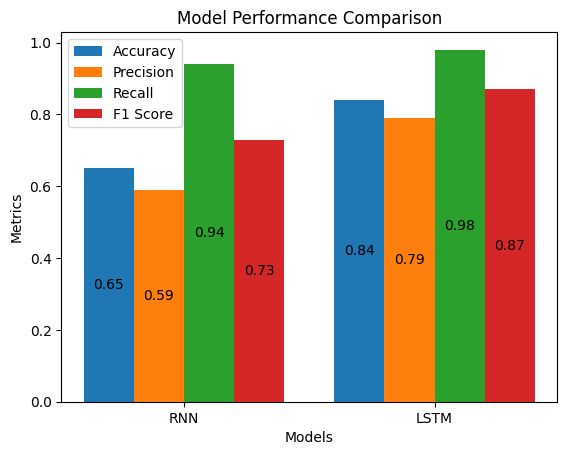

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for two models
model_names = ['RNN', 'LSTM'] 
accuracy = [.65, .84]
precision = [0.59, 0.79]
recall = [0.94, 0.98]
f1_score = [0.73, 0.87]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create a bar chart for accuracy
fig, ax = plt.subplots()
bars1 = ax.bar(r1, accuracy, color='tab:blue', width=bar_width, label='Accuracy')
bars2 = ax.bar(r2, precision, color='tab:orange', width=bar_width, label='Precision')
bars3 = ax.bar(r3, recall, color='tab:green', width=bar_width, label='Recall')
bars4 = ax.bar(r4, f1_score, color='tab:red', width=bar_width, label='F1 Score')

# Add labels to the bars
ax.bar_label(bars1, labels=np.round(accuracy, decimals=2), label_type='center')
ax.bar_label(bars2, labels=np.round(precision, decimals=2), label_type='center')
ax.bar_label(bars3, labels=np.round(recall, decimals=2), label_type='center')
ax.bar_label(bars4, labels=np.round(f1_score, decimals=2), label_type='center')

# Add x-axis and y-axis labels
ax.set_xlabel('Models')
ax.set_ylabel('Metrics')

# Add a legend
ax.legend()

# Add the model names below the bars
ax.set_xticks([r + bar_width * 1.5 for r in range(len(model_names))])
ax.set_xticklabels(model_names)

# Set the plot title
plt.title('Model Performance Comparison')

# Show the plot
plt.show()
